In [ ]:
# Goal: code to draw random walk 

In [4]:
# generating random numbers 
randint(1,2) # generates number between 1,2

2

In [21]:
randint(0,1) #generate 0,1, each with probability 1/2

1

In [16]:
# want random number that is -1,1, each with probability 1/2
#CHALLENGE: generate this using only randint(0,1) (and arithmetic)

In [28]:
2*randint(0,1) # either 0,2, each with probability 1/2

2

In [32]:
2*randint(0,1) - 1 # -1,1 with prob 1/2 each

-1

In [33]:
def basic_rand_walk(num_steps):
    """Produce random walk with num_steps number of steps. 
    Go up or down at each step, with probability 1/2 each."""
    vert_list = [0] # list of vertical positions; vert_list[i] will be vertical pos at time i
    for n in range(num_steps):
        rand = 2*randint(0,1)-1 # -1,1 with prob 1/2 each
        new_vert = vert_list[-1] + rand # new vertical position
        vert_list.append(new_vert)
    return vert_list
        

In [36]:
basic_rand_walk(10)

[0, -1, -2, -3, -2, -1, -2, -1, 0, -1, -2]

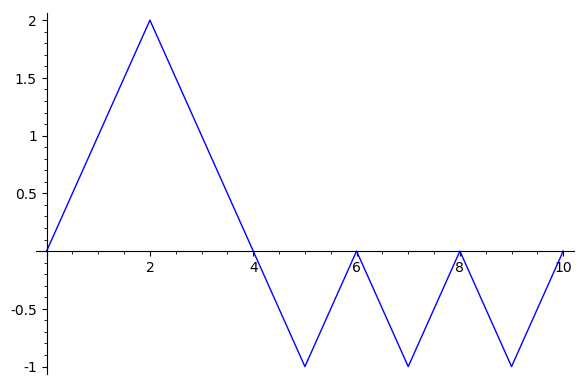

In [51]:
p10=list_plot(basic_rand_walk(10), plotjoined=true)
show(p10)

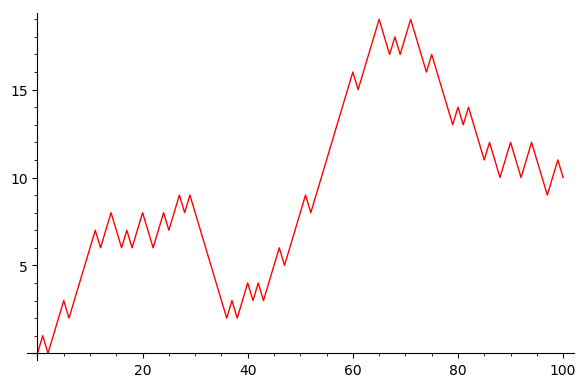

In [55]:
p100=list_plot(basic_rand_walk(100), plotjoined=true, color='red')
show(p100)

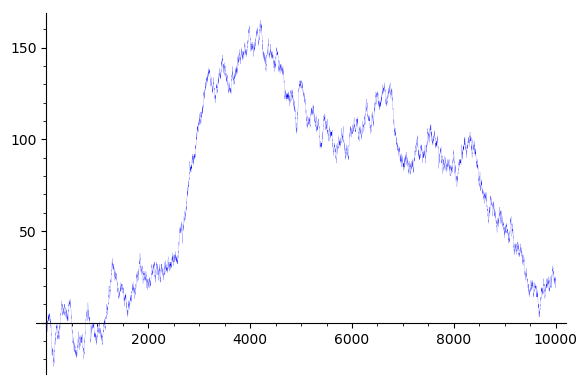

In [47]:
list_plot(basic_rand_walk(10000), plotjoined=true, thickness=0.1)

In [49]:
p=list_plot(basic_rand_walk(10000), plotjoined=true, thickness=0.1)

In [50]:
p.save("basic_rand_walk10000.pdf")

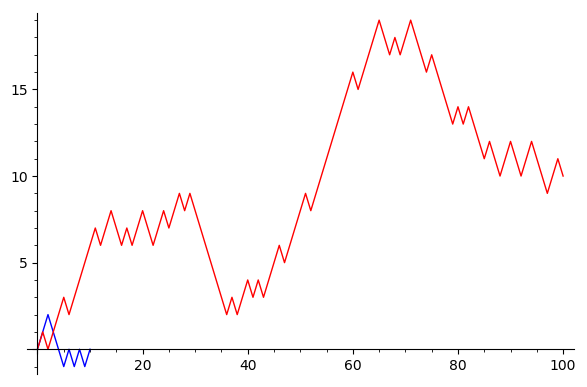

In [56]:
show(p10+p100)

In [ ]:
# Goal: have everything take place in a fixed box (fixed range of x,y axis), 
# even as n gets large
# How should we scale horizontal step size, vertical step size? 
# For horizontal, should make step size 1/n

In [57]:
def rand_walk(num_steps, horiz_step, vert_step):
    """Produce random walk as list of (x,y) pairs with num_steps number of steps. 
    Size of horizontal step = horiz_step.
    Size of vertical step = vert_step.
    Go up or down at each step, with probability 1/2 each."""
    pos_list = [(0,0)] # list of positions given by x,y coords
    for n in range(num_steps):
        rand = 2*randint(0,1)-1 # -1,1 with prob 1/2 each
        new_vert = pos_list[-1][1] + vert_step*rand # new vertical position
        new_horiz = pos_list[-1][0] + horiz_step
        pos_list.append((new_horiz,new_vert))
    return pos_list

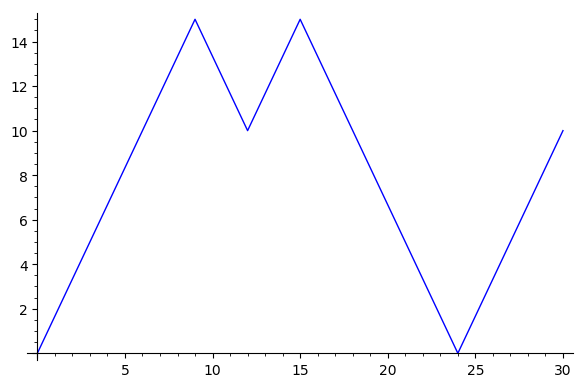

In [61]:
list_plot(rand_walk(10, 3, 5), plotjoined=true)

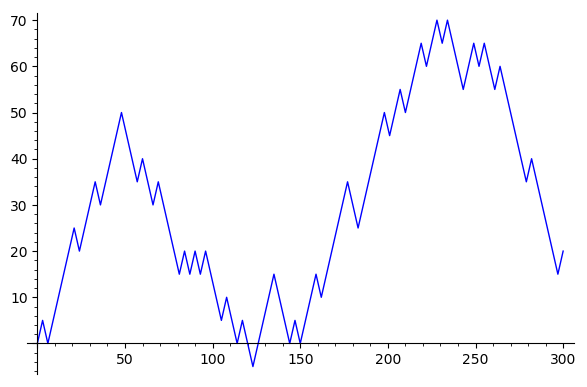

In [62]:
list_plot(rand_walk(100, 3, 5), plotjoined=true)

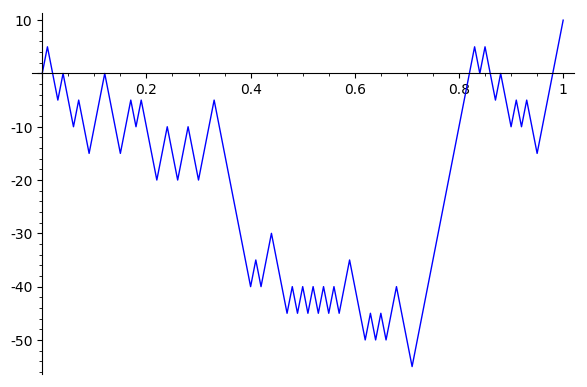

In [64]:
list_plot(rand_walk(100, 1/100, 5), plotjoined=true)

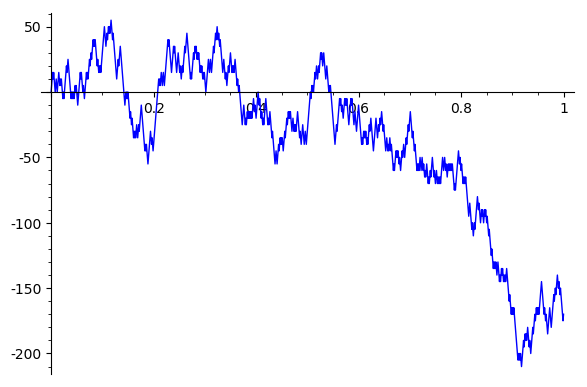

In [65]:
list_plot(rand_walk(1000, 1/1000, 5), plotjoined=true)

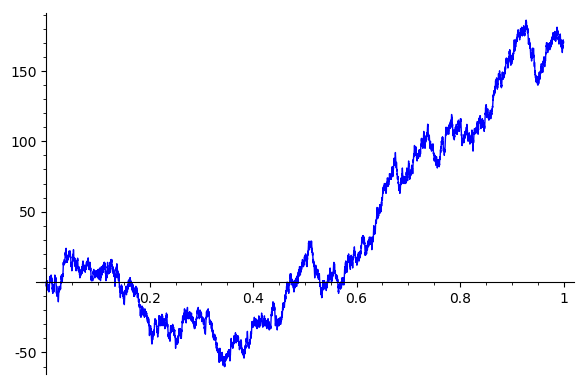

In [82]:
# to get horizontal range to be (0,1), should take horiz_step = 1/num_steps
n=10000
list_plot(rand_walk(n, 1/n, 1), plotjoined=true)

In [ ]:
# Experiment to see how far move in vertical direction
# num_steps = 100 -> 10, 10, 15
# 1000 -> 50, 25, 40
# 10000 -> 110, 100, 200
# Pattern: vertical movement approximately sqrt(num_steps)

In [87]:
# Correct scaling for both horiz and vert:
n=100
p100=list_plot(rand_walk(n, 1/n, 1/sqrt(n)), plotjoined=true)

In [88]:
# Correct scaling for both horiz and vert:
n=1000
p1000=list_plot(rand_walk(n, 1/n, 1/sqrt(n)), plotjoined=true, color='red')

In [89]:
# Correct scaling for both horiz and vert:
n=10000
p10000=list_plot(rand_walk(n, 1/n, 1/sqrt(n)), plotjoined=true, color='green')

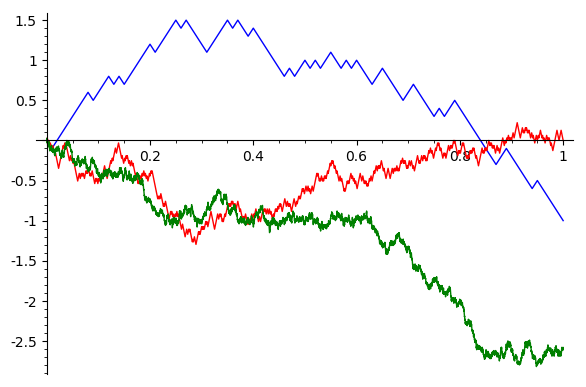

In [90]:
show(p100+p1000+p10000)
# Correctly scaled, we can now compare random walks with different numbers of steps